Hypothesis 2:
- H0: Air quality of borough of interest 1 = Air quality of borough of interest 2
- H1: Air quality of borough of interest 1 > Air quality of borough of interest 2

Areas of interest are defined as:
Boroughs with highest and lowest Greenspace - Havering and City of London

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import data_cleaning as dc
import api
from scipy import stats
from scipy.stats import norm

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#Import DF
df = dc.full_clean()

In [3]:
#Call API for each City
Hav = api.get_place_aqi(df, 'Havering',100)
Hav = np.asarray(Hav)
len(Hav)

198

In [4]:
Col = api.get_place_aqi(df, 'City of London', 100)
Col = np.asarray(Col)
len(Col)

198

In [6]:
x1 = Hav
x2 = Col

In [7]:
#Find mean and standard deviation for each sample
np.mean(x1), np.std(x1)

(82.68686868686869, 6.902856186261699)

In [8]:
np.mean(x2), np.std(x2)

(71.44949494949495, 7.896104060920397)

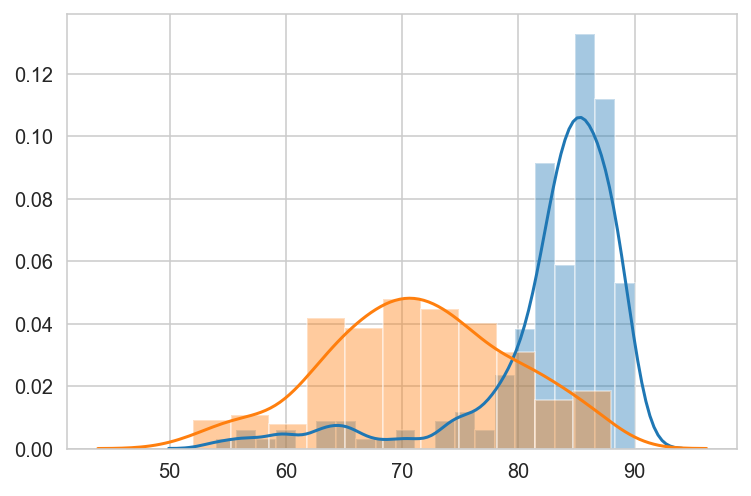

In [9]:
#Visually inspecting the distributions for differences in mean and standard deviation
sns.distplot(x1), sns.distplot(x2);

In [10]:
#Function for variance in each sample
def sample_variance(sample):
    var = np.var(sample)
    return var

In [11]:
#Finding each variance
sample_variance(x1), sample_variance(x2)

(47.64942352821141, 62.34845934088358)

In [12]:
#Finding the critical T Value and P Value
def twosample_tstatistic(sample1, sample2):
    stat = stats.ttest_ind(sample1, sample2, equal_var = False)
    return stat

two_t = twosample_tstatistic(x1, x2)
t_stat = two_t.statistic
p_val = two_t.pvalue
print('T-Stat: ',t_stat, ' P-Val: ',p_val)

T-Stat:  15.038543450622265  P-Val:  1.404678518355042e-40


In [13]:
def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = np.mean(rv)
    std = np.std(rv)

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = norm.pdf(rv)

    return xs, ys # Return calculated values

ValueError: x and y must have same first dimension, but have shapes (100,) and (198,)

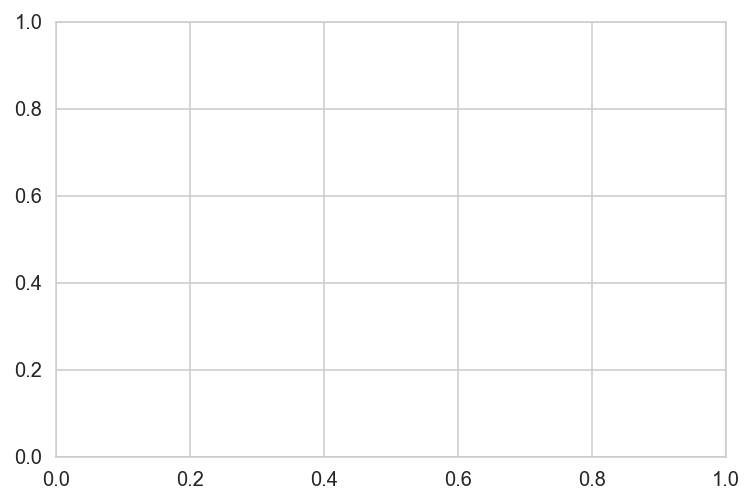

In [20]:
#Havering
xs, ys = evaluate_PDF(x1)
xs, ys
plt.plot(xs, ys, label='Havering', linewidth=4, color='#beaed4') 

#City of London
xs, ys = evaluate_PDF(x2)
plt.plot(xs, ys, label='City of London', linewidth=4, color='#fdc086')

plt.xlabel('height (cm)')

In [15]:
len(xs)

100

In [16]:
len(ys)

198

In [17]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [18]:
Cohen_d(x1, x2)

1.515261747559408

In [ ]:
# Visualize p_value
def visualize_t(t_stat, sample1, sample2):
    
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    
    # generate points on the x axis:
    xs = np.linspace(-5, 5, 500)
    
    # use stats.t.pdf to get values on the probability density function for the t-distribution    
    n_1 = len(sample1)
    n_2 = len(sample2)
    mean = 0
    std = 1
    ys= stats.t.pdf(xs, (n_1+n_2), mean, std)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    
#     # use stats.t.ppf to get critical value. For alpha = 0.05 and two tailed test
#     crit = stats.t.ppf(1-0.05, (len(sample1+sample2)))
    
#     ax.axvline(crit, color='black', linestyle='--', lw=5)
#     ax.axvline(-crit, color='black', linestyle='--', lw=5)
    
    
#     alpha = 0.05 / len(xs)
#     ax.axvline(alpha, color='black', linestyle=':', lw=5)
#     ax.axvline(-alpha, color='black', linestyle=':', lw=5)
    
    plt.show()

sample1 = x1
sample2 = x2

visualize_t(t_stat, x1, x2)

As our P-Value is not less than our alpha value, we are acceting the Null Hypothesis, H0, and concluding that there is no significant difference between samples.